In [10]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"


#importing the csv file
df=pd.read_csv(r"C:\Users\sachi\Downloads\Instagram-Reach.csv")

In [11]:
#reading the data head
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [12]:

# Convert date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])
df.head()



,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


In [13]:
# analyze the trend of Instagram reach over time using a line chart
fig = px.line(df, x='Date', y='Instagram reach', title='Instagram reach Over Time')
fig.show()

In [15]:
# analyze Instagram reach for each day using a bar chart
df_grouped = df.groupby('Date').sum().reset_index()

# create a bar chart of Instagram reach over time
fig = px.bar(df_grouped, x='Date', y='Instagram reach', title='Instagram reach by day')
fig.show()

In [6]:
#create the code for the distribution of Instagram reach using a box plot

fig = px.box(df, y="Instagram reach", title="Distribution of Instagram Reach")
fig.show()

In [46]:
#create a day column and analyze reach based on the days of the week  and write the code


df['Day of Week'] = df['Date'].dt.day_name()

In [47]:
df.head()

,Date,Instagram reach,Day of Week
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


In [19]:
import numpy as np



# Convert date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# Compute daily stats
day_stats = df.groupby(df['Date'].dt.day_name())['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
day_stats.rename(columns={'Date': 'day'}, inplace=True)

# Create figure
fig = go.Figure()


In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['day'], y=day_stats['mean'], name='Mean'))
fig.add_trace(go.Bar(x=day_stats['day'], y=day_stats['median'], name='Median'))
fig.add_trace(go.Bar(x=day_stats['day'], y=day_stats['std'], name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', xaxis_title='Day', yaxis_title='Instagram Reach')
fig.show()




In [30]:
 #Forecasting using Time Series Forecasting
    
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = df[["Date", "Instagram reach"]]

result = seasonal_decompose(df['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()    

<Figure size 640x480 with 0 Axes>

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

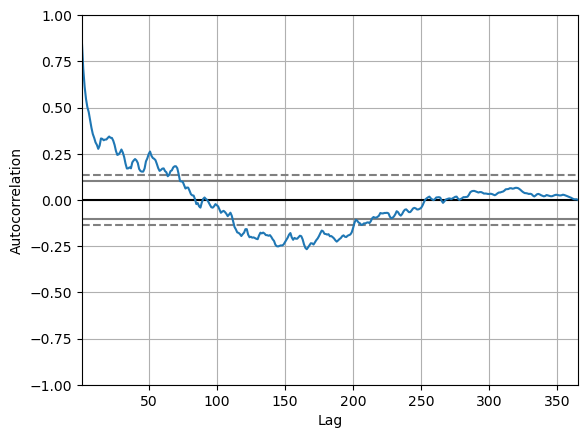

In [32]:
pd.plotting.autocorrelation_plot(df["Instagram reach"])

C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



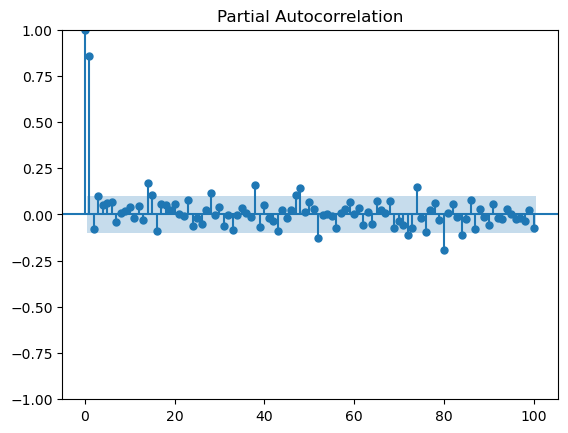

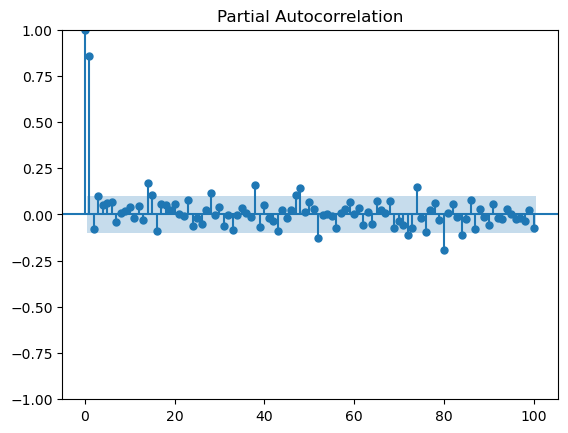

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Instagram reach"], lags = 100)

In [38]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(df['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())


C:\Users\sachi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.510
Date:                            Fri, 28 Apr 2023   AIC                           7919.021
Time:                                    17:50:53   BIC                           8000.157
Sample:                                         0   HQIC                          7951.309
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1878      6.981      0.027      0.979     -13.494      13.870
ar.L2          0.4787      6.499   

In [43]:
predictions = model.predict(len(df), len(df)+100)

trace_train = go.Scatter(x=df.index, 
                         y=df["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index, 
                        y=predictions, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()
